# K-Means Clustering Mini-Project

In this project, we’ll apply k-means clustering to our Enron financial data. Our final goal, of course, is to identify persons of interest; since we have labeled data, this is not a question that particularly calls for an unsupervised approach like k-means clustering.

Nonetheless, you’ll get some hands-on practice with k-means in this project, and play around with feature scaling, which will give you a sneak preview of the next lesson’s material.

In [1]:
import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [2]:
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [3]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [4]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

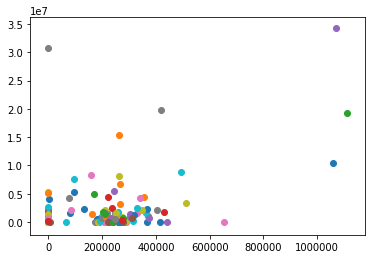

In [5]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

## Deploying Clustering

Deploy k-means clustering on the financial_features data, with 2 clusters specified as a parameter.   
Store your cluster predictions to a list called __pred__, so that the __Draw()__ command works properly. In the scatterplot that pops up, are the clusters what you expected?

## Variables : Salary and Expected_stock_options

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans = KMeans(n_clusters = 2).fit(finance_features)

In [8]:
pred = kmeans.predict(finance_features)

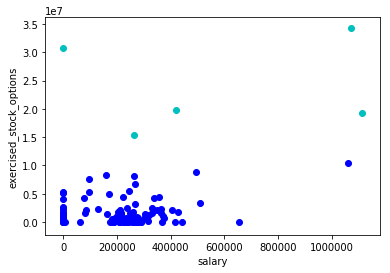

In [9]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.png", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

## Clustering with 3 Features

Add a third feature to features_list, “total_payments". Now rerun clustering, using 3 input features instead of 2 (obviously we can still only visualize the original 2 dimensions). Compare the plot with the clusterings to the one you obtained with 2 input features. Do any points switch clusters? How many? This new clustering, using 3 features, couldn’t have been guessed by eye--it was the k-means algorithm that identified it.

In [10]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

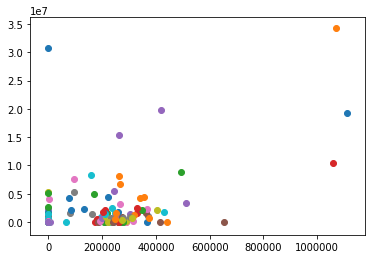

In [11]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features:
    plt.scatter( f1, f2 )
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 2).fit(finance_features)
pred = kmeans.predict(finance_features)

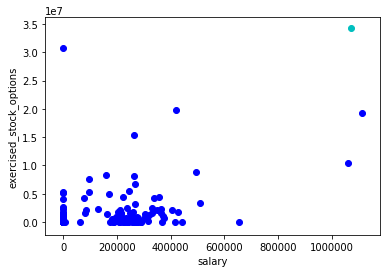

In [13]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters3.png", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

### Observe : 4 points switch cluster.

By adding another feature you are adding an extra dimension and so now the distances between points are measured in these three dimensions. This can lead to different clusterings of points and different cluster arrangements.

### Two points changed clusters when we rescaled the features.

## Stock Option Range
What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?

#### Observe the range

In [14]:
features_list = ['exercised_stock_options']
ex_stock_option = featureFormat(data_dict, features_list )

In [15]:
print "Maximum value of 'exercised_stock_options' is : ", numpy.amax(ex_stock_option)

Maximum value of 'exercised_stock_options' is :  34348384.0


In [16]:
print "Minimum value of 'exercised_stock_options' is : ", numpy.amin(ex_stock_option)

Minimum value of 'exercised_stock_options' is :  3285.0


## Salary Range
What are the maximum and minimum values taken by “salary”? 

#### Observe the range

In [17]:
features_list = ['salary']
salary = featureFormat(data_dict, features_list )

In [18]:
print "Maximum value of 'salary' is : ", numpy.amax(salary)

Maximum value of 'salary' is :  1111258.0


In [19]:
print "Maximum value of 'salary' is : ", numpy.amin(salary)

Maximum value of 'salary' is :  477.0
